In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

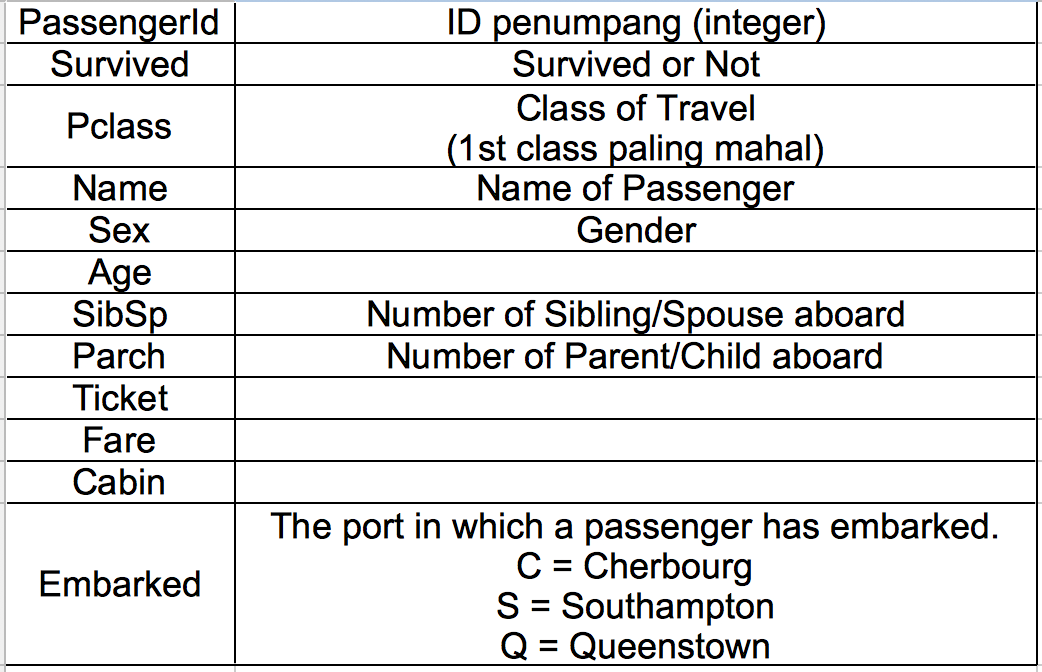

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv("../04 - KNN & Scikit-learn/data/titanic.csv",index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_selected = df.drop(columns=["Name","Ticket"])
df_selected.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


# Quick Exploratory Data Analysis ( Quick EDA )

```
Pada Course ini disediakan library untuk check data missing
yaitu dengan mengimport jcopml.plot import plot_missing_value
```

In [5]:
from jcopml.plot import plot_missing_value

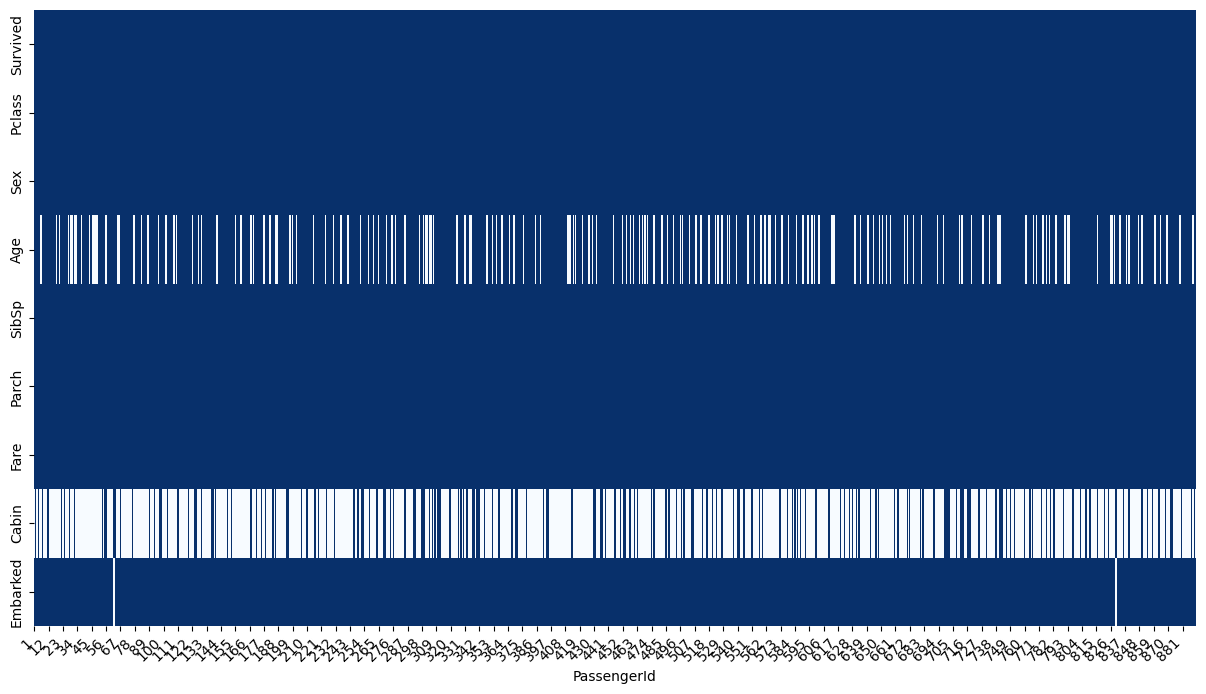

In [6]:
plot_missing_value(df_selected)

```
Kalau dengan pandas biasa
```

In [7]:
df_selected.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

```
Disini dikarenakan banyak data cabin yang kosong atau null maka diputuskan untuk dihapus
```

In [8]:
df_selected.drop(columns=["Cabin","Age"],inplace=True)
df_selected.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


```
Jadi dilakukan check sekali lagi setelah di drop feature cabin
```

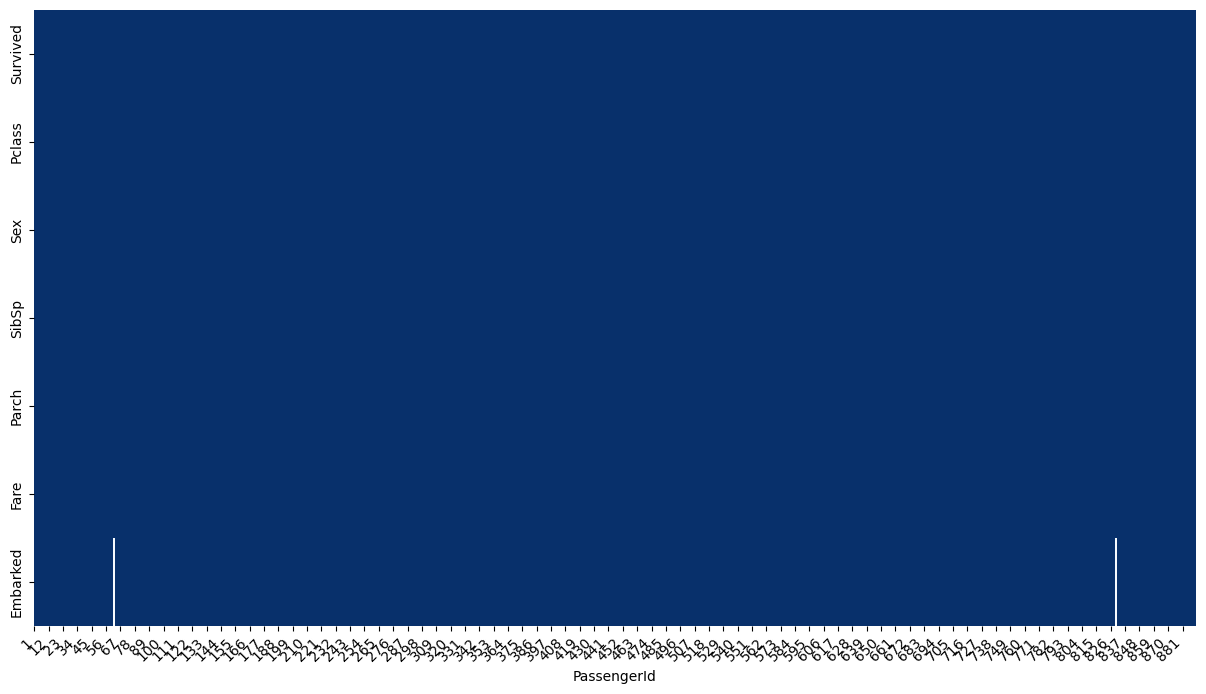

In [9]:
plot_missing_value(df_selected)

In [10]:
df_selected.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

```
disini ingin dilakukan check pada embark agar tau kota asal mana yang paling banyak berasal
```

In [17]:
df_selected["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

```
Mengisi value kosong dengan modus ( Data terbanyak yang muncul )
mengapa mengisi dengan modus dikarenakan tipe data categorikal
```

In [21]:
df_selected["Embarked"] = df_selected["Embarked"].fillna(df_selected["Embarked"].mode()[0])

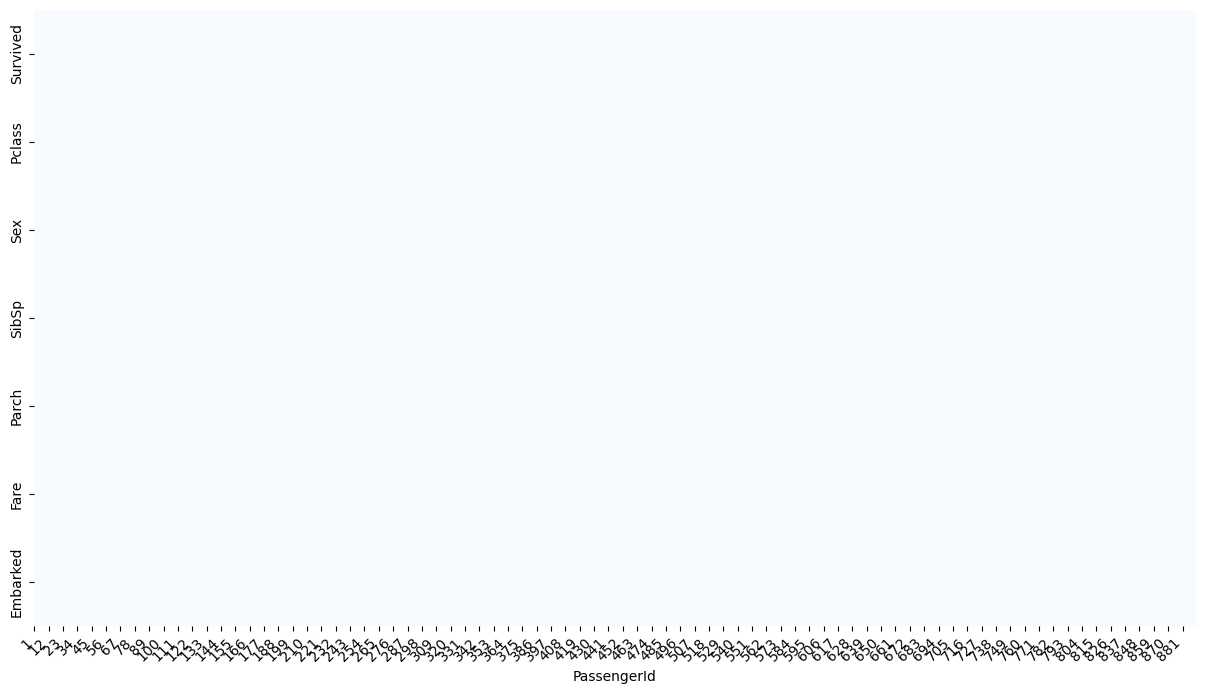

In [22]:
plot_missing_value(df_selected)

In [24]:
df_selected.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Persiapan Data

```
Melakukan proses pemisahan data yang mana variabel X(feature) dan y (label)
```

In [25]:
X = df_selected.drop(columns = "Survived") 
y = df_selected["Survived"]

In [26]:
df_selected.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    str    
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    str    
dtypes: float64(1), int64(4), str(2)
memory usage: 48.9 KB


In [35]:
cat_col = df_selected.select_dtypes(include=['str']).columns.tolist()
cat_col

['Sex', 'Embarked']

In [36]:
X = pd.get_dummies(X,columns=['Sex', 'Embarked','Pclass'])

In [38]:
X.head()

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,1,0,7.2500,False,True,False,False,True,False,False,True
2,1,0,71.2833,True,False,True,False,False,True,False,False
3,0,0,7.9250,True,False,False,False,True,False,False,True
4,1,0,53.1000,True,False,False,False,True,True,False,False
5,0,0,8.0500,False,True,False,False,True,False,False,True


In [40]:
X.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SibSp       891 non-null    int64  
 1   Parch       891 non-null    int64  
 2   Fare        891 non-null    float64
 3   Sex_female  891 non-null    bool   
 4   Sex_male    891 non-null    bool   
 5   Embarked_C  891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
 8   Pclass_1    891 non-null    bool   
 9   Pclass_2    891 non-null    bool   
 10  Pclass_3    891 non-null    bool   
dtypes: bool(8), float64(1), int64(2)
memory usage: 28.0 KB


# Intro to Scikit-learn

In [41]:
from sklearn.neighbors import KNeighborsClassifier

```
Disini karena bertujuan untuk melakukan prediksi yang bersifat clasifikasi maka knn yang di import 
adalah KNeighborsClassifier jika sifatnya regresi maka akan menjadi KNeighborsReggresor
```

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [44]:
knn.score(X,y)

0.8787878787878788

# Concept 1 : Dataset Splitting

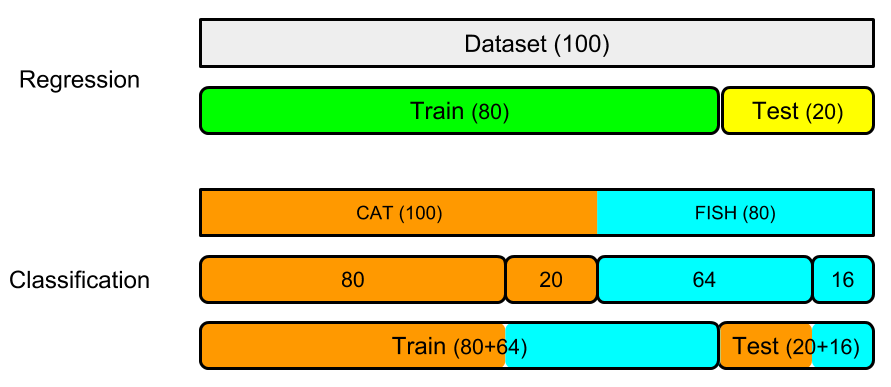

In [45]:
illustration.train_test_split

In [46]:
from sklearn.model_selection import train_test_split

In [51]:
X.shape

(891, 11)

In [53]:
X = df_selected.drop(columns = "Survived") 
y = df_selected["Survived"]
X = pd.get_dummies(X,columns=['Sex', 'Embarked','Pclass'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

 ```
Disini dikarenakan datanya bersifat klasifikasi pada train_test_split perlu ditambahkan stratify=y 
dikarenakan takutnya pada jumlah datanya tidak merata pada suatu bagian test atau trainnya
```

In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [56]:
print(f"Hasil Dari Train : {knn.score(X_train,y_train)}")
print(f"Hasil Dari Train : {knn.score(X_test,y_test)}")

Hasil Dari Train : 0.9101123595505618
Hasil Dari Train : 0.7262569832402235


# Kesimpulanya 

```
Mengapa pada percobaan sebelumnya hasilnya berbeda saat datanya sudah di split dikarenakan pada saat
dilakukan train dengan semua data dan di uji dengan data yang sama model bukannya memahami tetapi menghapal
dan ini bisa disebut juga sebagai overfitting
```

# Concept 2: K-fold Cross Validation

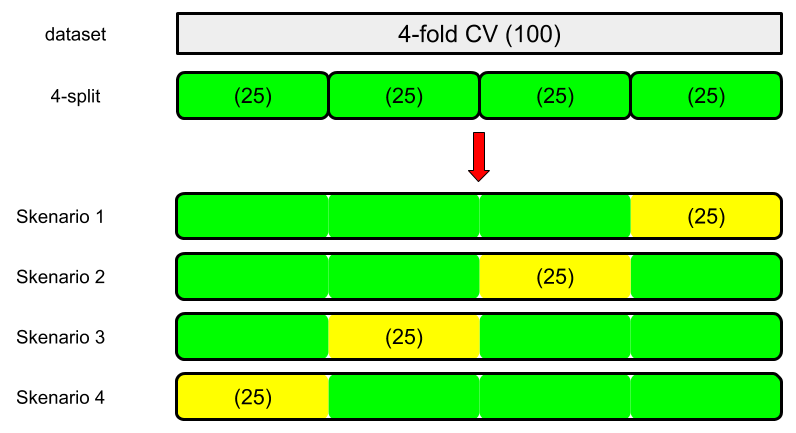

In [59]:
illustration.kfold_cv

```
Cross Validation merupakan sebuah metode dalam memisahkan datasewaktu training model
yang membedakan dengan train_split_test adalah k-fold-cv ini membagi dengan jumlah yang sama rata
dan setiap batch atau hasil pembagiannya ada scorenya masing masing dan accurasi atau skor akhir yang
akan digunakan adalah hasil rata rata dari setiap batch yang sudah terbuat
```

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn,X,y,cv=5)

array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

```
untuk mendapatkan accurasi akhir dengan menambahkan.mean()
```

In [62]:
cross_val_score(knn,X,y,cv=5).mean()

np.float64(0.703778796058)

# Improvement melalui data: Feature Scaling

In [64]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

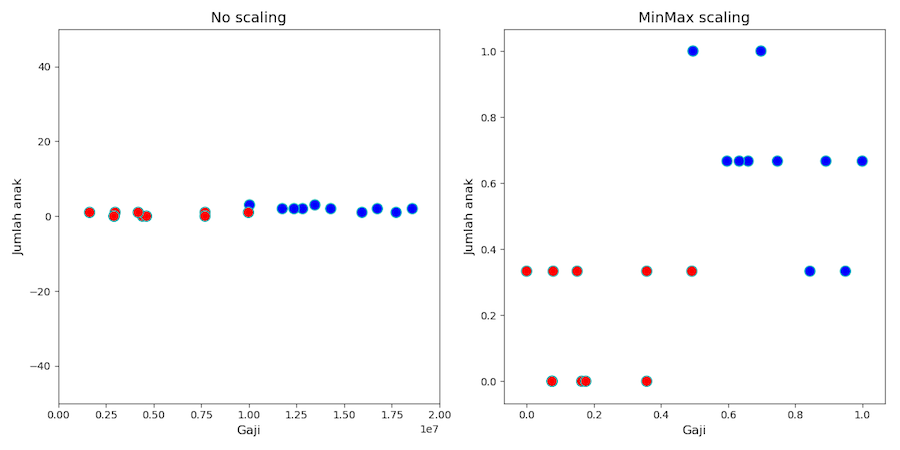

In [65]:
illustration.knn_scaling

```
Disini mengapa perlu menggunakan scaling dikarenakan pada kasus algoritma yang memerlukan perhitungan 
distance variabel x dan y yang jomplang seperti contoh No Scaling itu sangat membuat model kebingungan
dalam mempelajari data maka dari itu ada feature scaling yang membuat data seperti di press ke ukuran yang
di inginkan contohnya 0 - 1 dan ini sangat membantu model dalam memahami distance
```

```
Menurut Chatgpt
Feature scaling diperlukan terutama pada algoritma berbasis distance seperti KNN dan SVM, karena perbedaan skala 
antar fitur dapat menyebabkan fitur dengan nilai besar mendominasi perhitungan jarak. 
Dengan scaling, setiap fitur berada dalam skala yang sebanding sehingga model dapat belajar pola secara lebih seimbang.
```

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [70]:
print(f"Hasil Dari Train : {knn.score(X_train_scaled,y_train)}")
print(f"Hasil Dari Train : {knn.score(X_test_scaled,y_test)}")

Hasil Dari Train : 0.8525280898876404
Hasil Dari Train : 0.6312849162011173


# Improvement melalui model: Parameter Tuning

## Tuning n_neighbors Tanpa Scaling

In [83]:
neighbor = range(1,51,2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7541899441340782
n_neighbor: 3


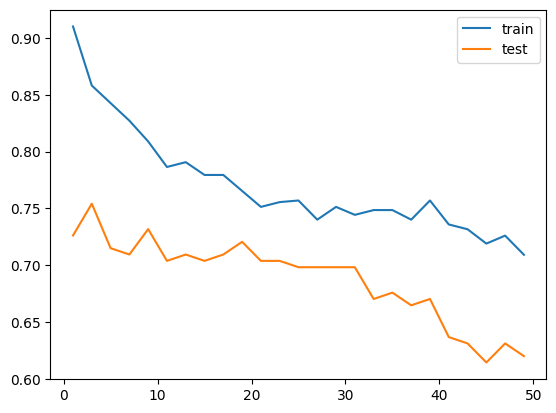

In [84]:
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor,test_score,label="test")
plt.legend()

## Tuning n_neighbors dengan Scaling

In [85]:
neighbor = range(1,51,2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)

    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7988826815642458
n_neighbor: 31


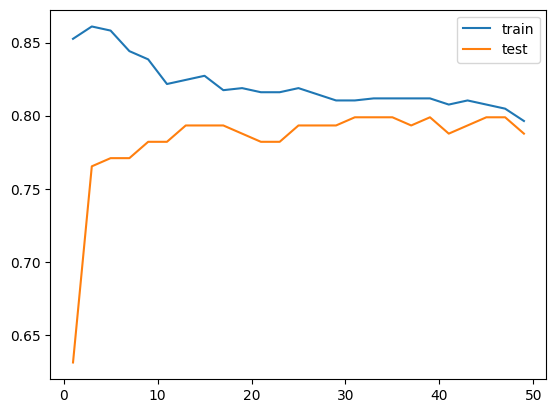

In [86]:
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor,test_score,label="test")
plt.legend()

## Tuning n_neighbors dengan Scaling + weight by distance

In [88]:
neighbor = range(1,51,2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_train_scaled,y_train)

    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7988826815642458
n_neighbor: 49


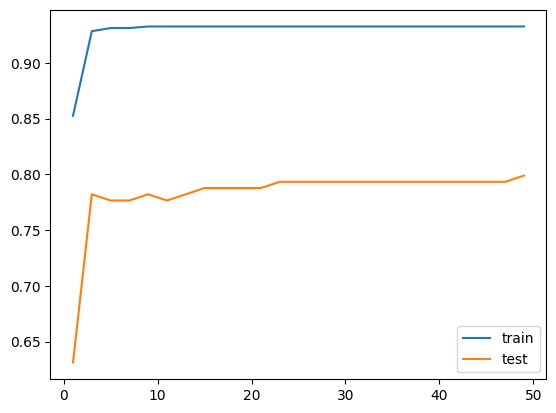

In [89]:
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor,test_score,label="test")
plt.legend()

## Tuning n_neighbors dengan Scaling + weight by Manhattan distance

In [92]:
neighbor = range(1,51,2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance",p=1) # jika menggunakan p=2 sama saja dengan pythogoras
    knn.fit(X_train_scaled,y_train)

    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7932960893854749
n_neighbor: 23


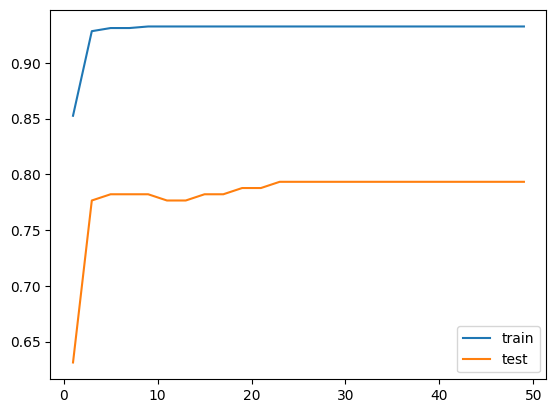

In [91]:
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor,test_score,label="test")
plt.legend()

# Kesimpulan